In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cars = pd.read_csv("cleaned_used_cars.csv")
numerical_cars = cars.select_dtypes(include=['int64', 'float64']) #take the numerical columns
numerical_cars.head()

,year,selling_price,km_driven,mileage,engine (CC),max_power (bhp),torque (Nm),seats
0,2014,450000,145500,23.40,1248.0,74.00,190.00,5
1,2014,370000,120000,21.14,1498.0,103.52,250.00,5
2,2006,158000,140000,17.70,1497.0,78.00,124.54,5
3,2010,225000,127000,23.00,1396.0,90.00,219.67,5
4,2007,130000,120000,16.10,1298.0,88.20,112.78,5


In [94]:
corr_matrix = numerical_cars.corr()
corr_matrix.head()

,year,selling_price,km_driven,mileage,engine (CC),max_power (bhp),torque (Nm),seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,0.089465,0.010222
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.475258,0.047135
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.080224,0.219860
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.251733,-0.452085
engine (CC),0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.598185,0.610309


selling_price      1.000000
max_power (bhp)    0.748489
torque (Nm)        0.475258
engine (CC)        0.455734
year               0.414092
seats              0.047135
mileage           -0.126054
km_driven         -0.225534
Name: selling_price, dtype: float64

<Axes: xlabel='max_power (bhp)', ylabel='selling_price'>

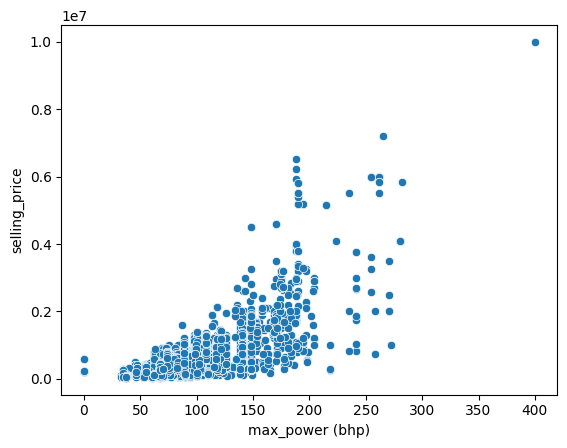

In [ ]:
corr_selling_price = corr_matrix["selling_price"] #to include only the "selling_price" column
display(corr_selling_price.sort_values(ascending=False)) #display command to force show the output
#max_power has the highest correlation, therefore it will have the highest impact on the price.
#km_driven has the lowest negative correlation. We'll take it into account as well.
sns.scatterplot(data = cars, x = "max_power (bhp)", y = "selling_price")

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power (bhp) clipped, Length: 8128, dtype: float64

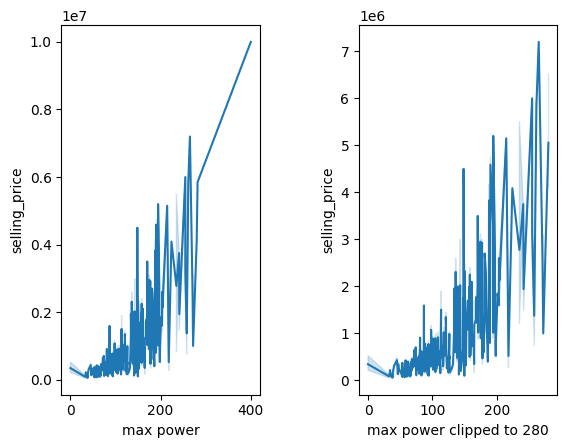

In [96]:
#second phase of cleaning the "max_power" column
max_bhp = 280
cars["max_power (bhp) clipped"] = cars["max_power (bhp)"].clip(upper = max_bhp) #limit to remove the outliers
display(cars["max_power (bhp) clipped"])
plt.subplot(1, 2, 1)
sns.lineplot(data = cars, x = "max_power (bhp)", y = "selling_price")
plt.xlabel("max power")
plt.subplot(1, 2 ,2)
sns.lineplot(data = cars, x = "max_power (bhp) clipped", y = "selling_price")
plt.xlabel("max power clipped to 280")
plt.subplots_adjust(wspace = 0.5)

selling_price      1.000000
max_power (bhp)    0.748489
torque (Nm)        0.475258
engine (CC)        0.455734
year               0.414092
seats              0.047135
mileage           -0.126054
km_driven         -0.225534
Name: selling_price, dtype: float64

<Axes: xlabel='km_driven', ylabel='selling_price'>

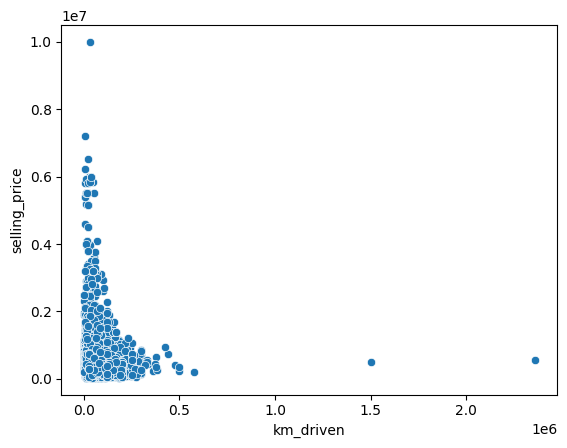

In [97]:
display(corr_selling_price.sort_values(ascending=False))
sns.scatterplot(data = cars, x = "km_driven", y = "selling_price")
#We can see the negative correlation clearly with the help of visualization

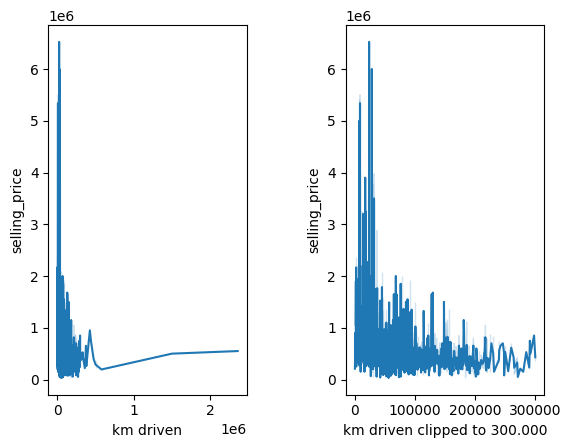

In [ ]:
#second phase of cleaning the "km_driven" column
max_km = 300000
cars['km_driven clipped'] = cars['km_driven'].clip(upper=max_km) #limit to remove the outliers
plt.subplot(1,2, 1)
sns.lineplot(data = cars, x = "km_driven", y = "selling_price")
plt.xlabel("km driven")
plt.subplot(1,2,2)
sns.lineplot(data = cars, x = "km_driven clipped", y = "selling_price")
plt.xlabel("km driven clipped to 300.000")
plt.subplots_adjust(wspace = 0.5)